# Customer Churn Analysis

## Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.
New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1691]:
# Importing required libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1692]:
# Importing the dataset

customer = pd.read_csv('Telecom_customer_churn.csv',skipinitialspace=True)
customer.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  
2      Mailed check          53.85        108.15    Yes  

[3 rows x 21 columns]

# Exploratory Data Analysis (EDA)

## Data Preprocessing

In [1693]:
# Checking the dimension of the dataset

customer.shape

(7043, 21)

In [1694]:
# Checking the features present in the dataset

customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1695]:
# Checking the information about the dataset

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1696]:
# Checking if there are any null values present in the dataset

customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [1697]:
# Checking the unique value present in the dataset

customer.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [1698]:
# Checking the value count for the feature gender

customer['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [1699]:
# Checking the value count for the feature SeniorCitizen

customer['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [1700]:
# Checking the value count for the feature Partner

customer['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [1701]:
# Checking the value count for the feature Dependents

customer['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [1702]:
# Checking the value count for the feature tenure

customer['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
64     80
56     80
52     80
26     79
25     79
61     76
14     76
65     76
60     76
46     74
19     73
29     72
27     72
30     72
63     72
20     71
53     70
62     70
41     70
32     69
50     68
47     68
51     68
54     68
58     67
49     66
57     65
31     65
43     65
37     65
42     65
34     65
33     64
55     64
48     64
40     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, dtype: int64

In [1703]:
# Checking the value count for the feature PhoneService

customer['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [1704]:
# Checking the value count for the feature MultipleLines

customer['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [1705]:
# Checking the value count for the feature InternetService

customer['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [1706]:
# Checking the value count for the feature OnlineSecurity

customer['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [1707]:
# Checking the value count for the feature OnlineBackup

customer['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [1708]:
# Checking the value count for the feature DeviceProtection

customer['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [1709]:
# Checking the value count for the feature TechSupport

customer['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [1710]:
# Checking the value count for the feature StreamingTV

customer['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [1711]:
# Checking the value count for the feature StreamingMovies

customer['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [1712]:
# Checking the value count for the feature Contract

customer['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [1713]:
# Checking the value count for the feature PaperlessBilling

customer['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [1714]:
# Checking the value count for the feature PaymentMethod

customer['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [1715]:
# Checking the value count for the feature MonthlyCharges

customer['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
19.70     43
19.65     43
19.55     40
20.15     40
19.75     39
20.25     39
20.35     38
19.80     38
20.10     37
19.60     37
20.20     35
19.50     32
20.45     31
19.40     31
20.40     30
19.45     28
20.50     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
25.00     17
19.20     17
84.80     17
20.75     17
74.40     16
81.00     15
24.80     15
24.45     15
20.60     15
20.85     15
79.20     14
70.15     14
25.05     14
25.15     14
79.85     14
80.45     14
89.85     13
75.35     13
95.00     13
69.95     13
20.70     13
89.55     13
80.85     13
24.70     12
70.30     12
75.50     12
94.40     12
25.40     12
24.95     12
19.10     12
74.90     12
55.00     12
80.55     12
84.30     12
85.45     12
85.30     12
80.60     11
74.35     11
60.00     11
75.10     11
74.30     11
24.40     11
90.05     11
19.15     11
80.00     11
99.00     11
55.30     11

In [1716]:
# Checking the value count for the feature TotalCharges

customer['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
19.55       7
45.30       7
19.45       6
20.25       6
20.15       6
20.45       5
20.30       5
70.60       4
74.70       4
69.90       4
19.30       4
69.60       4
19.40       4
19.20       4
19.95       4
19.85       4
20.50       4
20.40       4
44.40       4
44.00       4
69.95       4
75.30       4
50.15       4
49.90       4
20.35       4
69.65       4
19.50       4
45.85       3
69.10       3
220.45      3
74.60       3
20.90       3
1284.20     3
2317.10     3
74.30       3
69.25       3
20.55       3
19.25       3
50.60       3
44.75       3
75.35       3
79.55       3
19.10       3
20.00       3
35.90       3
74.35       3
86.05       3
74.90       3
70.15       3
24.40       3
20.10       3
70.45       3
305.55      3
45.70       3
50.45       3
85.00       3
84.50       3
55.70       3
25.25       3
85.50       3
50.75       3
69.55       3
45.10       3
70.10       3
24.80       3
470.20      3
70.30 

In [1717]:
# Checking the value count for the feature Churn

customer['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [1718]:
# Dropping the column CustomerID

customer.drop(['customerID'],axis=1,inplace=True)
customer.shape

(7043, 20)

In [1720]:
# Splitting the dataset by Categorical and Numerical

customer_cat =[]

for i in customer.columns:
    if customer[i].dtypes=='object':
        customer_cat.append(i)
        
customer_num=[]
for i in customer.columns:
    if customer[i].dtypes!='object':
        customer_num.append(i)

print('Categorical Features',customer_cat)
print('Numerical Features',customer_num)

Categorical Features ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Observations

Imported required libraries and dataset

Telecom_customer_churn dataset contains 7043 rows and 21 columns

Data types present in the dataset are float64 – 1, int64 - 1 and object -18

Total of 11 Null values are present in the dataset, in the column ‘Total Charges’

Analysed each feature by looking into the count of values present, and we dont see any abnormal or unknown value present in the dataset

Dropped the column Customer_Id, as these are unique values assigned to customer and it will not be much relevant for Model 

Dataset contains 7043 rows and 20 columns,after dropping the column Customer_Id 

Splitted the dataset by Categorical and Numerical features

# Data Visualization

<AxesSubplot:>

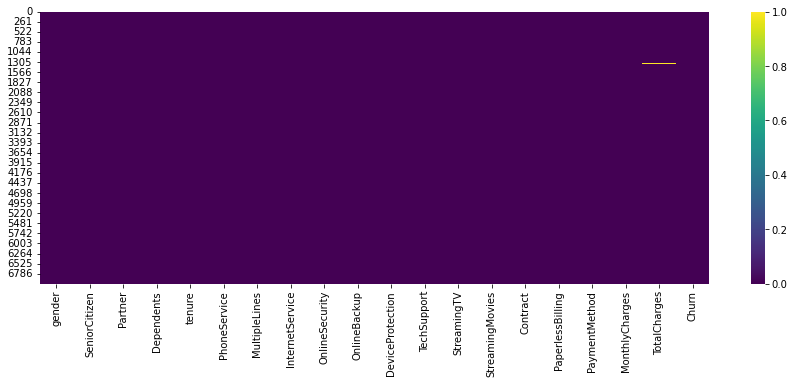

In [1721]:
plt.figure(figsize=(15,5))
sns.heatmap(customer.isnull(),cmap='viridis')

### Observations:
    
Above heatmap shows null values present in the dataset in the column Total Charges

## Univariate Analysis

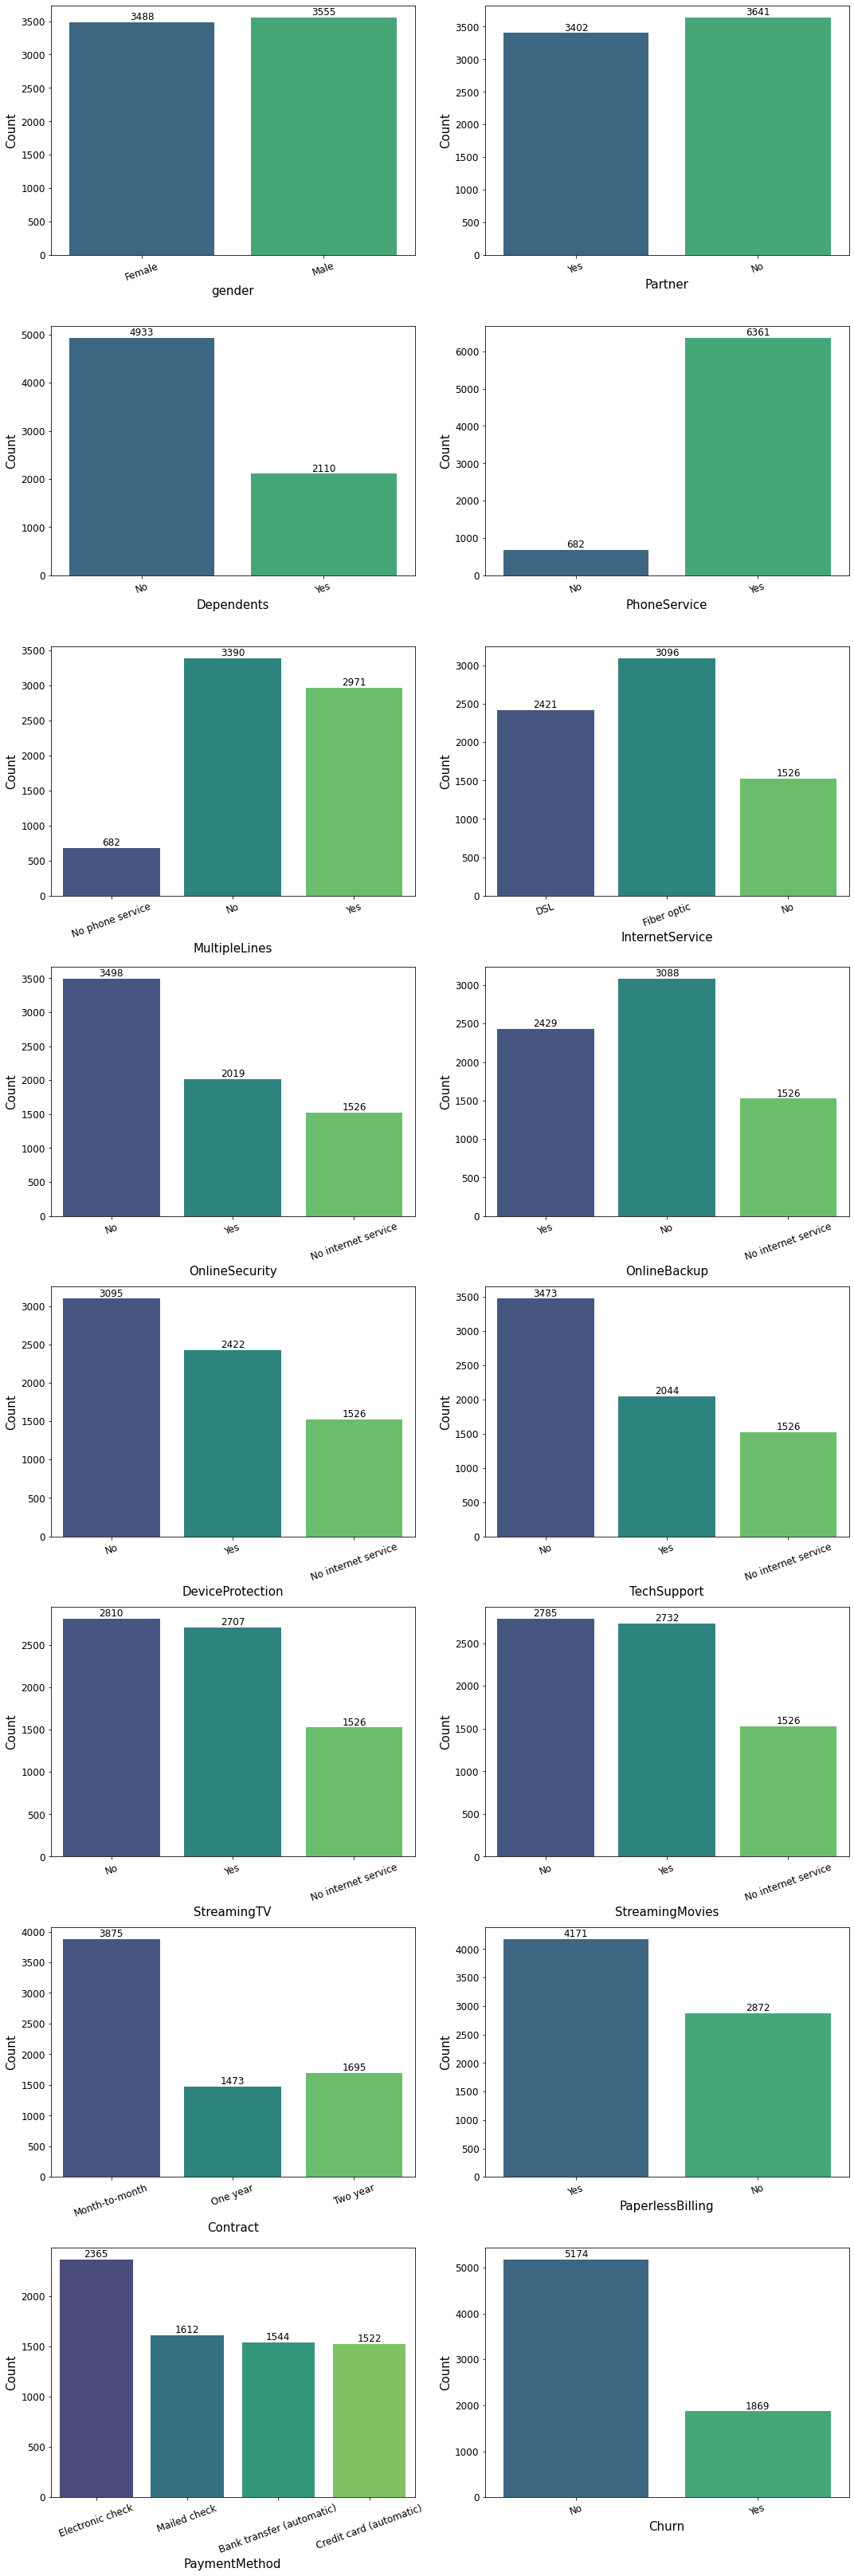

In [1722]:
# Visualizing categorical columns with 'countplot'

plt.figure(figsize=(15,45))
plot_num=1

for i in customer_cat:
    if plot_num<=16:
        sub=plt.subplot(8,2,plot_num)
        sns.countplot(customer[i],palette='viridis')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plt.xticks(rotation=20,fontsize=12)
        plt.yticks(fontsize=12)
    plot_num+=1
    
    for j in sub.containers:
        sub.bar_label(j,fontsize=12)
        
plt.tight_layout()

### Observations:
 
In gender both Male and Female count are almost same but Male count is slightly higher than female 

Customer’s without partner are higher than Customer’s with partner

Customer’s without Dependents are higher

Customer’s who use phone service are higher

No Multiple lines count of customer’s are high, when compared with customers opted for Multiple lines

In Internet Service, customer’s who use Fiber Optic are high than DSL

When looking into Online Security, most of the customers have not taken Online Security

Likewise, customer’s with no OnlineBackup is high

Customer’s with No Device Protection and Techsupport are high

Streaming Movies and TV are almost same, but customer’s who don’t stream movies and Tv are slightly higher

Customer’s with Month to Month contract is higher than Two year and One year, which shows most of the customer’s prefer Month to Month contract

Customer’s who prefers Paperless Billing is high compared with customer’s who dont prefer Paperless Billing

Most of the customer’s use Electronic check as payment method 

In this dataset Customer Churn No count is high with 5174 and Yes with 1869


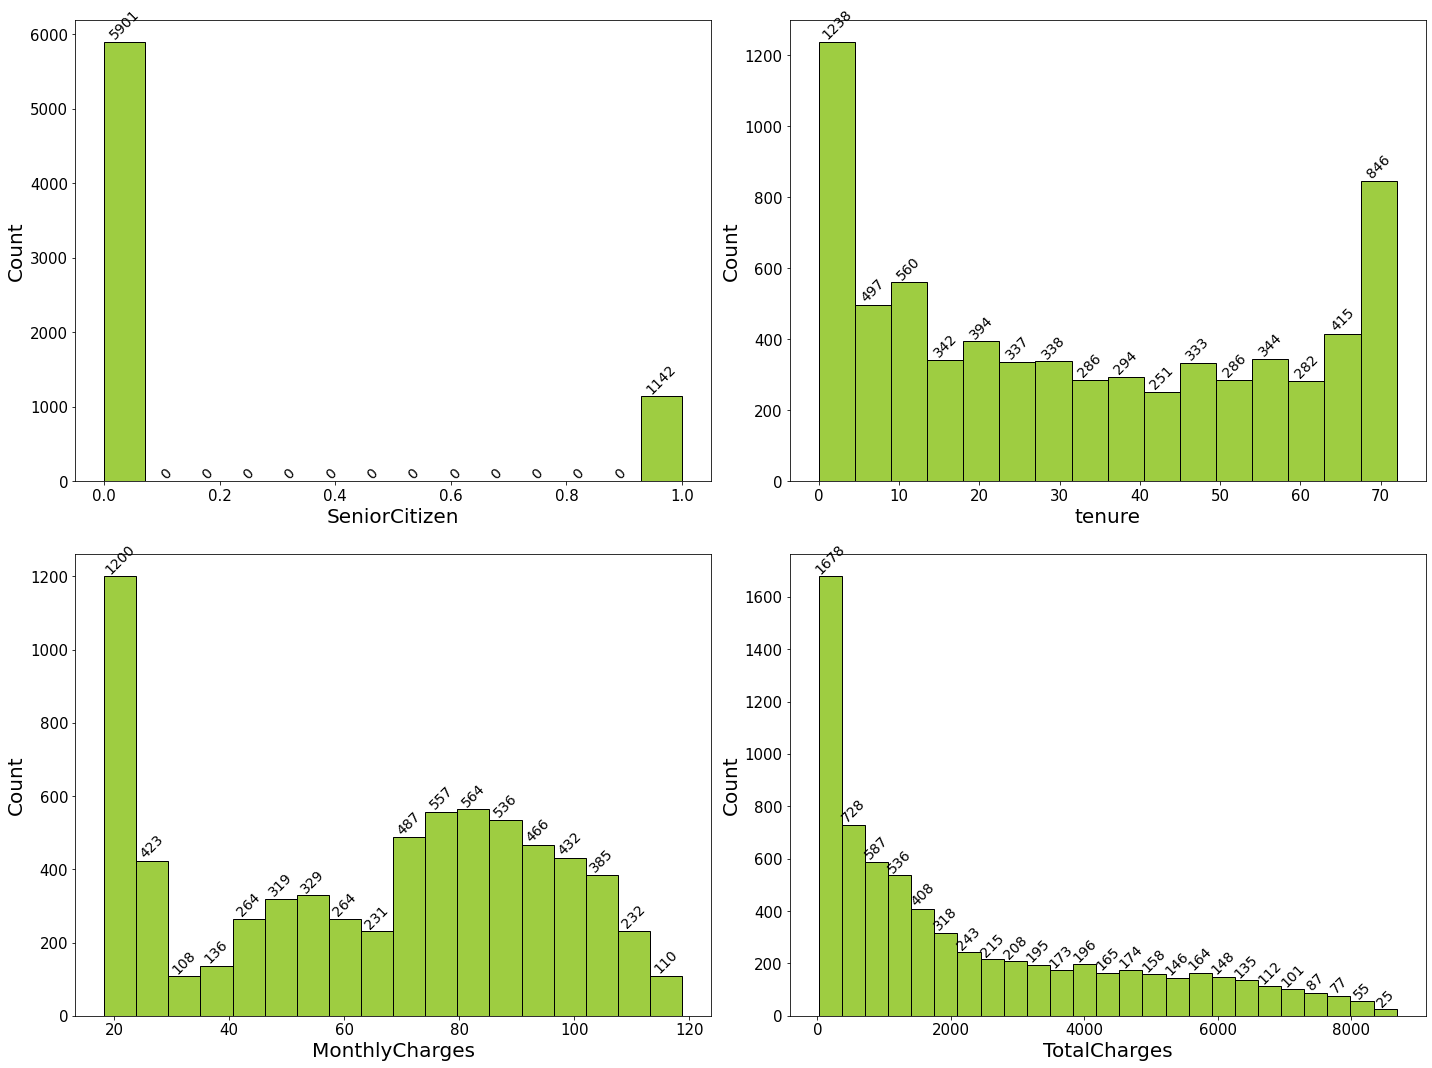

In [1723]:
# Visualizing the numerical features with histogram

plt.figure(figsize=(20,15))
plot_num=1

for i in customer_num:
    if plot_num<=4:
        sub = plt.subplot(2,2,plot_num)
        sns.histplot(customer[i],color='#7ebd01')
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Count',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plot_num+=1
    
    for j in sub.containers:
        sub.bar_label(j,fontsize=14,rotation=45)
plt.tight_layout()

### Observation

Senior citizen count is less in the overall customer's count

Most of the customer's tenure ranges between 1 to 10 and 70 to 72

Most of the customer's Monthly charges ranges between 19 to 25 and Total charges between 19 to 85

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

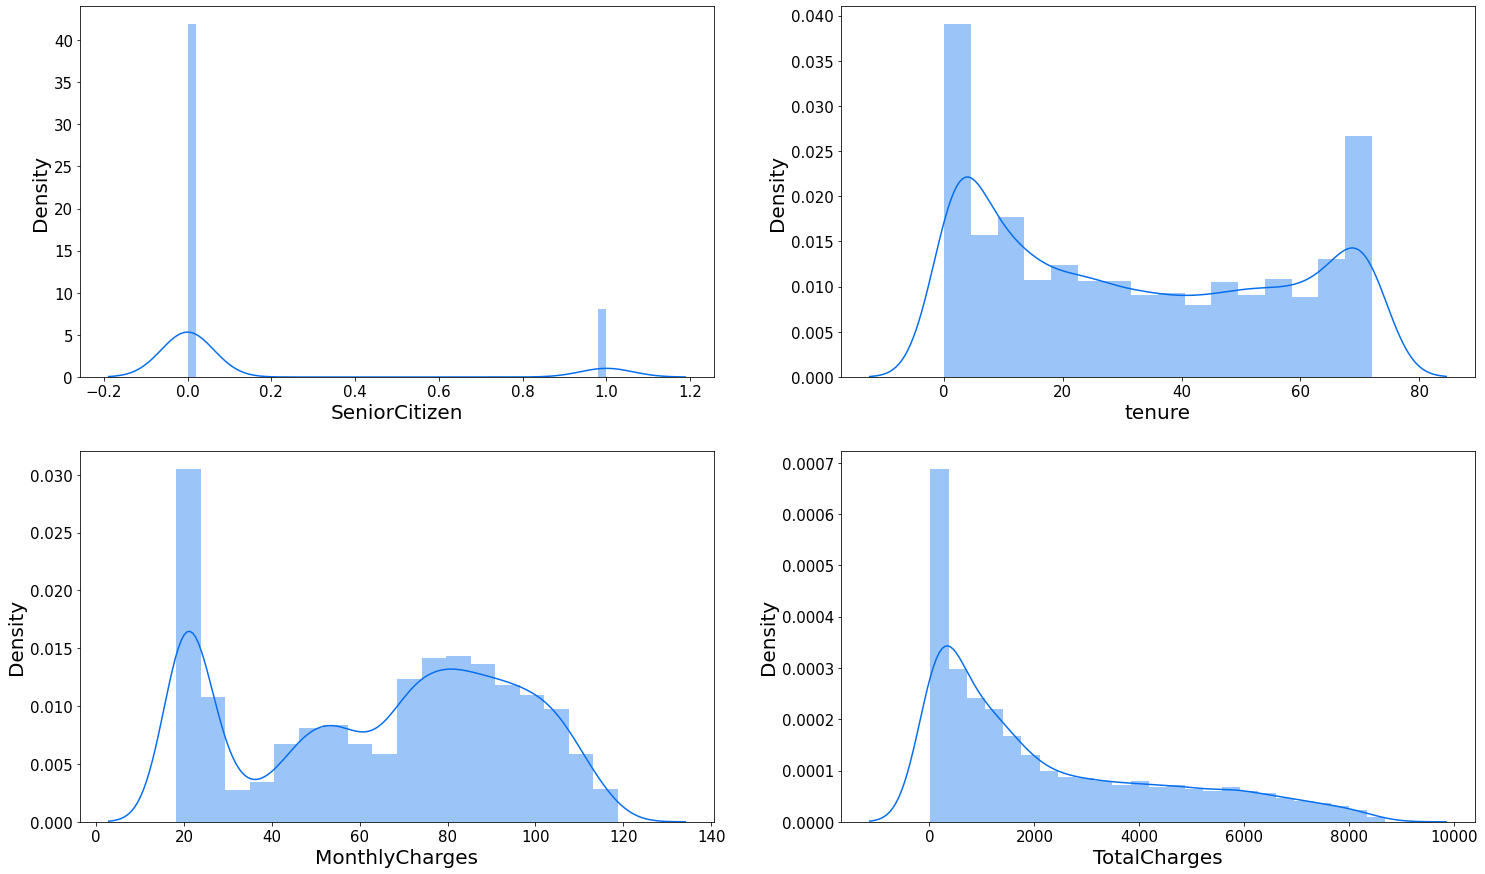

In [1724]:
# Checking the distribution of the numerical features using distplot

plt.figure(figsize=(25,15))
plot_num=1

for i in customer_num:
    if plot_num<=4:
        sub=plt.subplot(2,2,plot_num)
        sns.distplot(customer[i],color='#056eee')
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Density',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plot_num+=1
plt.tight_layout

### Observations

From the above distribution plot we can observe that the data in columns Senior citizen and Total Charges are skewed
towards right

In tenure and Monthly charges data is almost distributed normal

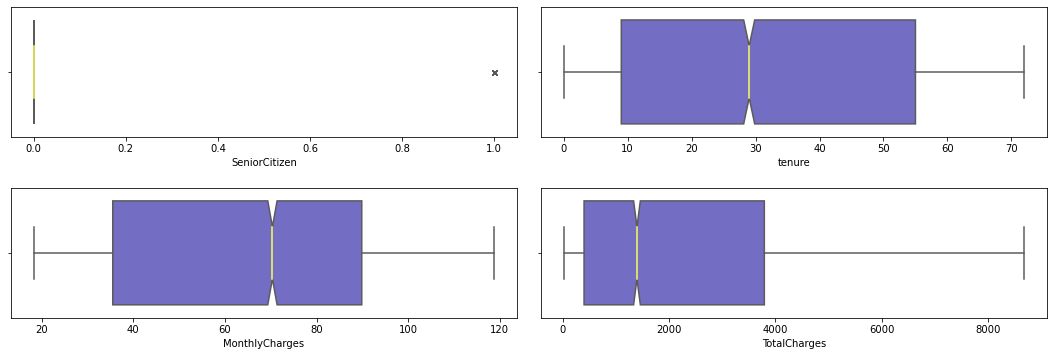

In [1725]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(15,30))
st = 1
for i in customer_num:
    if st <=24:
        sub = plt.subplot(12,2,st)
        sns.boxplot(customer[i],color='#665fd1',notch=True,
                    medianprops={"color": "#fdff52"},flierprops={"marker": "x"})
        plt.xlabel(i,fontsize=10)
        plt.tight_layout(pad=2.0)
    st+=1
plt.show()

### Observations

Above boxplot shows that dataset does not contain any outliers, except Senior Citizen with very minimal in numbers

## Bivariate and Multivariate Analysis

<Figure size 1080x2160 with 0 Axes>

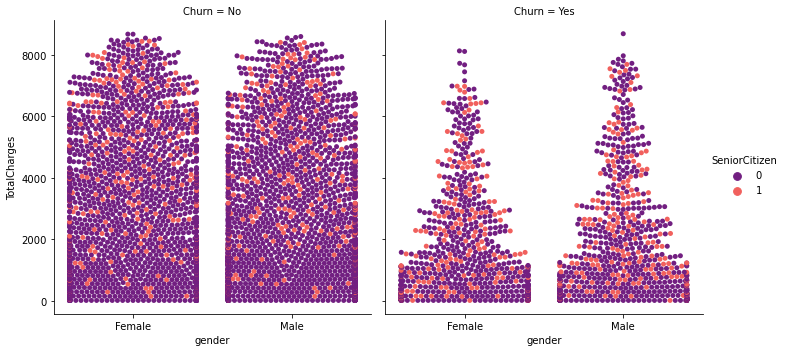

In [1726]:
# Visualizing gender Vs TotalCharges Vs Churn Vs SeniorCitizen using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="gender", y="TotalCharges", col="Churn",
               hue="SeniorCitizen",kind="swarm",palette='magma')

### Observations

Comparing gender Vs TotalCharges Vs Churn Vs SeniorCitizen, we can observe 

More number of Senior Citizen were Churner's, both Female and Male count are almost same in numbers.

Most of the Senior Citizen who were Churner's have Total Charges below 4000

Male count is higher than Female in Churner's count who have Total Charges above 4000

<Figure size 1080x2160 with 0 Axes>

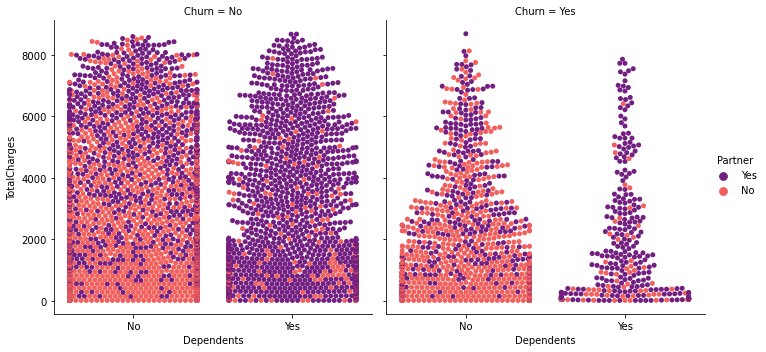

In [1727]:
# Visualizing Dependents Vs TotalCharges Vs Churn Vs Partner using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="Dependents", y="TotalCharges", col="Churn",
               hue="Partner",kind="swarm",palette='magma')

### Observations

Customer's count with No  Dependents and No Partner are high

Maximum Customer's churn are customers with No partner and No Dependents compared with Customer's with Partner and Dependents

<Figure size 1080x2160 with 0 Axes>

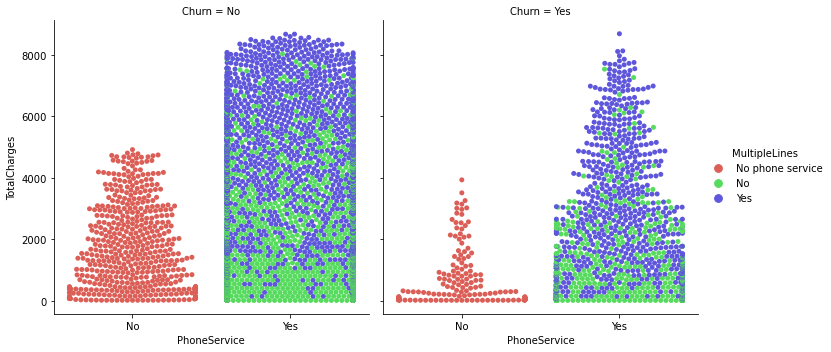

In [1728]:
# Visualizing PhoneService Vs TotalCharges Vs Churn Vs MultipleLines using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="PhoneService", y="TotalCharges", col="Churn",
               hue="MultipleLines",kind="swarm",palette='hls')

### Observations

When we observe PhoneService Vs TotalCharges Vs Churn Vs MultipleLines

Churner's were high with Customer's who use Phone Service and have Multiple Lines

Customer's(Both Churner's and Non Churner's) paying Total Charges below 4000 are maximum in numbers with No Phone Service and No Multiple Lines

<Figure size 1080x2160 with 0 Axes>

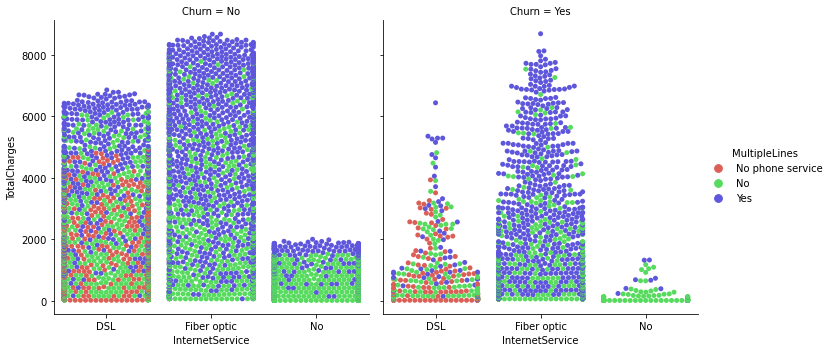

In [1729]:
# Visualizing InternetService Vs TotalCharges Vs Churn Vs MultipleLines using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="InternetService", y="TotalCharges", col="Churn",
               hue="MultipleLines",kind="swarm",palette='hls')

### Observations

Churner's count is high with customer's who uses Fiber Optic Internet Service and have Multiple Lines

Customer's(Both Churner's and Non Churner's) paying Total Charges between 19 to 4000 are maximum in numbers with No Phone Service and uses DSL

<Figure size 1080x2160 with 0 Axes>

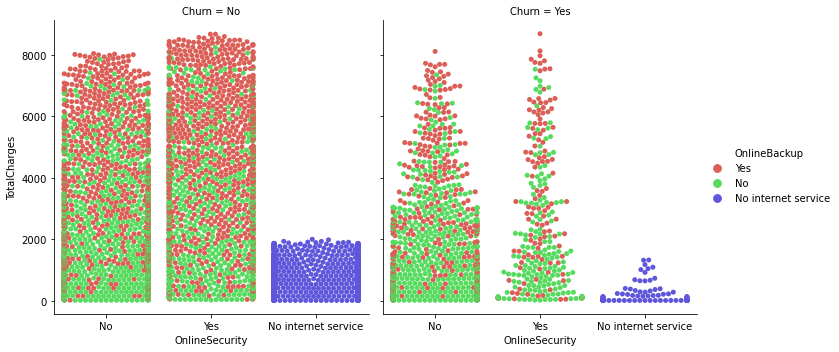

In [1730]:
# Visualizing OnlineSecurity Vs TotalCharges Vs Churn Vs OnlineBackup using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="OnlineSecurity", y="TotalCharges", col="Churn",
               hue="OnlineBackup",kind="swarm",palette='hls')

### Observations

Customers(Both Churner's and Non Churner's) who took Online Backup and Online Security are maximum in numbers and their Total charges are above 4000

Churner's count is high with customer's who dont have Online Backup and Online Security

Customers(Both Churner's and Non Churner's) who took Online Backup and not Online Security are also maximum in numbers and their Total charges are above 4000


<Figure size 1080x2160 with 0 Axes>

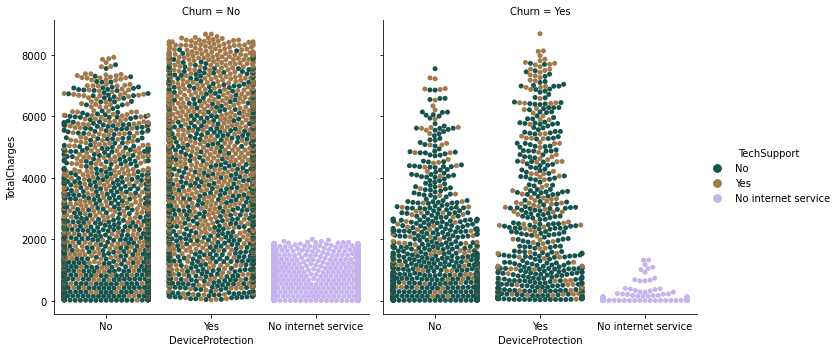

In [1731]:
# Visualizing DeviceProtection Vs TotalCharges Vs Churn Vs TechSupport using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="DeviceProtection", y="TotalCharges", col="Churn",
               hue="TechSupport",kind="swarm",palette='cubehelix')

### Observations

DeviceProtection Vs TotalCharges Vs Churn Vs TechSupport, we can observe

Most of the customers who took Tech Support are Non Churners, on the otherside we can see Customer's who didnt take Tech Support
are very high and they are Churner's

Churner's who didnt have Device Protection and No Tech Support are maximum in numbers with their Total Charges ranges between 19 to 4000

<Figure size 1080x2160 with 0 Axes>

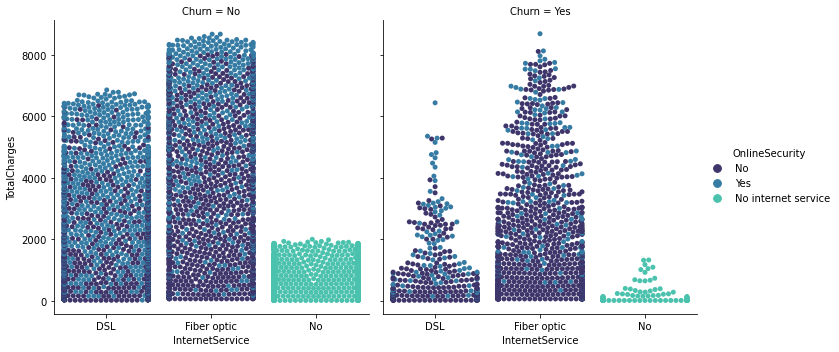

In [1732]:
# Visualizing InternetService Vs TotalCharges Vs Churn Vs OnlineSecurity using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="InternetService", y="TotalCharges", col="Churn",
               hue="OnlineSecurity",kind="swarm",palette='mako')

### Observations

If we compare InternetService Vs TotalCharges Vs Churn Vs OnlineSecurity

Most of the churner's are using Fiber Optic Internet service and they dont have Online Security

Churner's count is high, on those who uses Online Security and DSL

Most of the Customer's(Both Churner's and Non Churner's) who uses Online Security have Total charges above 4000

<Figure size 1080x2160 with 0 Axes>

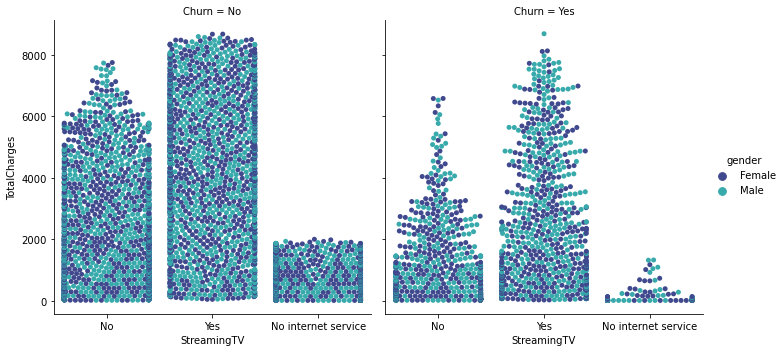

In [1733]:
# Visualizing StreamingTV Vs TotalCharges Vs Churn Vs gender using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="StreamingTV", y="TotalCharges", col="Churn",
               hue="gender",kind="swarm",palette='mako')

### Observations

In Streaming TV: Yes and No, Male customer's are high in both Churner's and Non Churner's 

<Figure size 1080x2160 with 0 Axes>

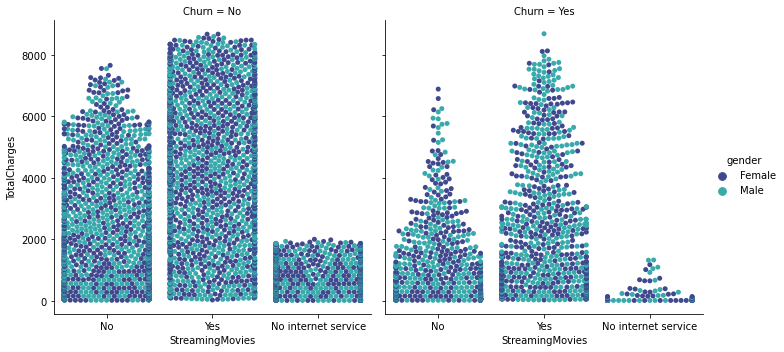

In [1734]:
# Visualizing StreamingMovies Vs TotalCharges Vs Churn Vs gender using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="StreamingMovies", y="TotalCharges", col="Churn",
               hue="gender",kind="swarm",palette='mako')

### Observations

In Streaming Movies: Yes and No, Male customer's are high in both Churner's and Non Churner's

<Figure size 1080x2160 with 0 Axes>

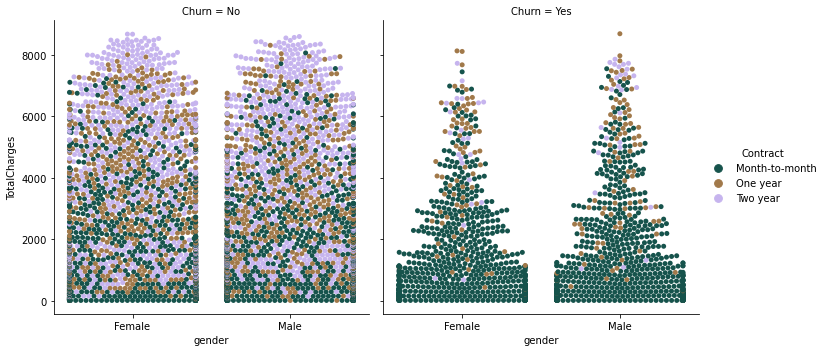

In [1735]:
# Visualizing gender Vs TotalCharges Vs Churn Vs Contract using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="gender", y="TotalCharges", col="Churn",
               hue="Contract",kind="swarm",palette='cubehelix')

### Observations

If we compare Gender Vs TotalCharges Vs Churn Vs Contract, we can observe

Both Male and Female Customer's who have taken Month-to-Month contract are maximum churner's

Maximum Customers who are paying Total Charges of above 4000 have taken Two year and One year contract

<Figure size 1080x2160 with 0 Axes>

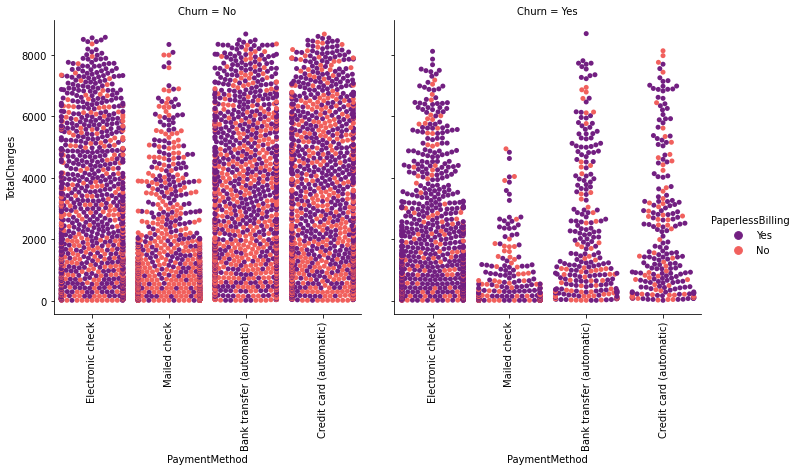

In [1736]:
# Visualizing PaymentMethod Vs TotalCharges Vs Churn Vs PaperlessBilling using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="PaymentMethod", y="TotalCharges", col="Churn",
               hue="PaperlessBilling",kind="swarm",palette='magma')
cat.set_xticklabels(rotation=90)

### Observations

In Payment method: Electronic check, Mailed check, Bank transfer(automatic) and Credit card(automated), we can 
observe customer's who are using paperless billing are maximum churner's

<Figure size 1080x2160 with 0 Axes>

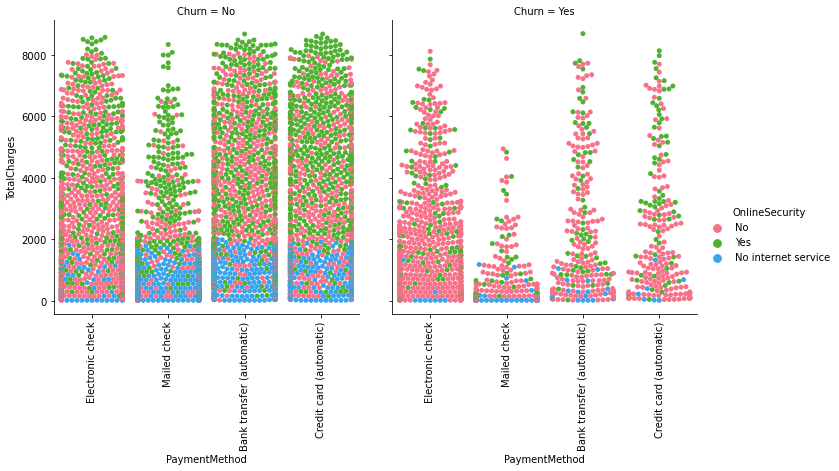

In [1737]:
# Visualizing PaymentMethod Vs TotalCharges Vs Churn Vs OnlineSecurity using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=customer, x="PaymentMethod", y="TotalCharges", col="Churn",
               hue="OnlineSecurity",kind="swarm",palette='husl')
cat.set_xticklabels(rotation=90)

### Observations

If we compare PaymentMethod Vs TotalCharges Vs Churn Vs OnlineSecurity

We can observe the same pattern, with customer's who are not using Online security are maximum churner's

Customer's who uses Online security are maximum Non churner's and their preferred payment methods are Mailed check,
Bank transfer(automatic) and Credit card(automatic), moreover maximum of all these customer's Total Charges ranges above 2000

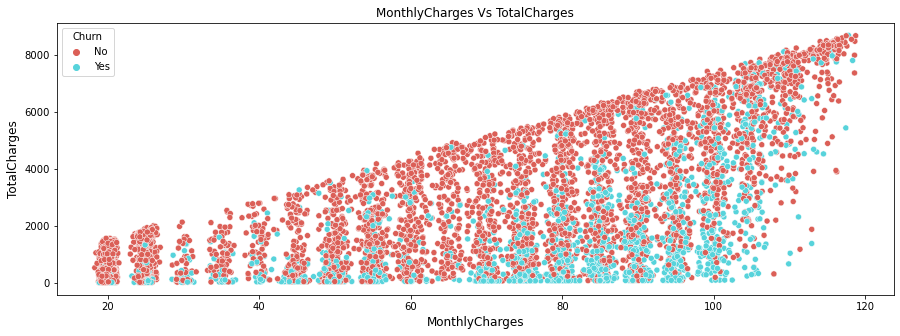

In [1738]:
# Comparing MonthlyCharges with TotalCharges by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=customer, x="MonthlyCharges", y="TotalCharges",hue='Churn',palette='hls')
plt.xlabel('MonthlyCharges',fontsize=12)
plt.ylabel('TotalCharges',fontsize=12)
plt.title('MonthlyCharges Vs TotalCharges',fontsize=12)
plt.show()

### Observations

Comparing Monthly Charges Vs Total Charges

Customer's who pay high Monthly Charges are maximum churner's, when comparing with paying low Monthly Charges

Paying high Monthly charges increases Total Charges which leads the customer's to churn

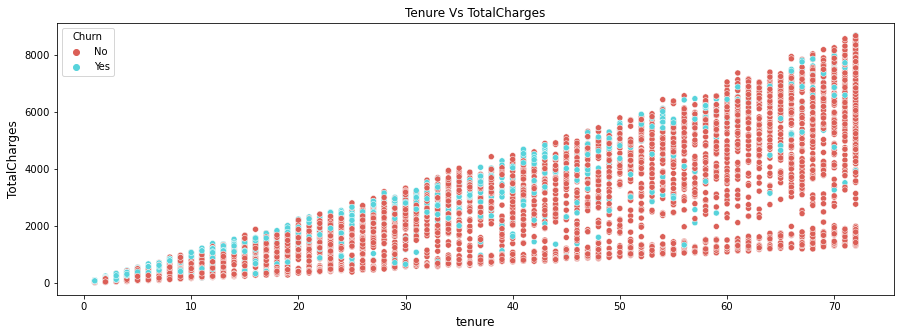

In [1739]:
# Comparing Tenure with TotalCharges by lineplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=customer, x="tenure", y="TotalCharges",hue='Churn',palette='hls')
plt.xlabel('tenure',fontsize=12)
plt.ylabel('TotalCharges',fontsize=12)
plt.title('Tenure Vs TotalCharges',fontsize=12)
plt.show()

### Observations

Customer's with less tenure are maximum churner's and most of their Total Charges are below 6000

# Data Feature Selection and Engineering

## Replacing Null values

In [1740]:
# Replacing Null values with median in the column Total Charges

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN,strategy="median")
customer['TotalCharges']=imp.fit_transform(customer['TotalCharges'].values.reshape(-1,1))

In [1741]:
customer.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

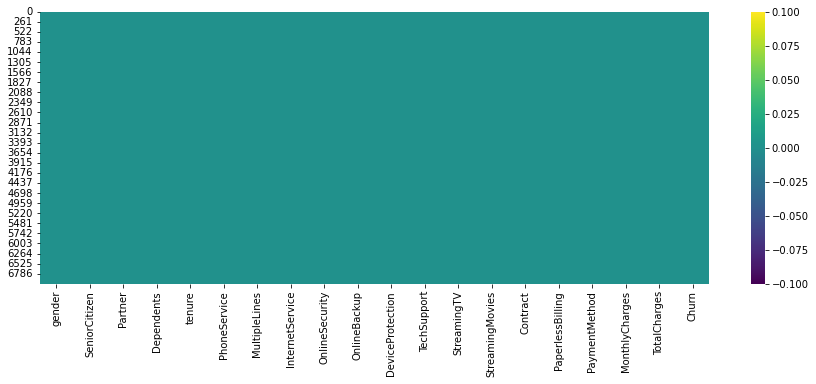

In [1742]:
plt.figure(figsize=(15,5))
sns.heatmap(customer.isnull(),cmap='viridis')

### Observations

Replaced Null values with median in the column Total Charges, eventhough the null values present are very minimal instead
of dropping those rows, replaced the null with median

Above heatmap shows there are no null values present in the dataset

In [1743]:
# Label encoding categorical columns


from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for i in customer.columns:
    if(customer[i].dtypes=='object'):
        customer[i]=le.fit_transform(customer[i].values.reshape(-1,1))

In [1744]:
customer.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1

### Observations

Applied label encoder to convert categorical columns to numerical for further analysis

## Describe - Statistical Summary

In [1745]:
customer.describe().T

count         mean          std    min      25%       50%  \
gender            7043.0     0.504756     0.500013   0.00    0.000     1.000   
SeniorCitizen     7043.0     0.162147     0.368612   0.00    0.000     0.000   
Partner           7043.0     0.483033     0.499748   0.00    0.000     0.000   
Dependents        7043.0     0.299588     0.458110   0.00    0.000     0.000   
tenure            7043.0    32.371149    24.559481   0.00    9.000    29.000   
PhoneService      7043.0     0.903166     0.295752   0.00    1.000     1.000   
MultipleLines     7043.0     0.940508     0.948554   0.00    0.000     1.000   
InternetService   7043.0     0.872923     0.737796   0.00    0.000     1.000   
OnlineSecurity    7043.0     0.790004     0.859848   0.00    0.000     1.000   
OnlineBackup      7043.0     0.906432     0.880162   0.00    0.000     1.000   
DeviceProtection  7043.0     0.904444     0.879949   0.00    0.000     1.000   
TechSupport       7043.0     0.797104     0.861551   0.00    0.000     1.000   
StreamingTV       7043.0     0.985376     0.885002   0.00    0.000     1.000   
StreamingMovies   7043.0     0.992475     0.885091   0.00    0.000     1.000   
Contract          7043.0     0.690473     0.833755   0.00    0.000     0.000   
PaperlessBilling  7043.0     0.592219     0.491457   0.00    0.000     1.000   
PaymentMethod     7043.0     1.574329     1.068104   0.00    1.000     2.000   
MonthlyCharges    7043.0    64.761692    30.090047  18.25   35.500    70.350   
TotalCharges      7043.0  2281.916928  2265.270398  18.80  402.225  1397.475   
Churn             7043.0     0.265370     0.441561   0.00    0.000     0.000   

                      75%      max  
gender               1.00     1.00  
SeniorCitizen        0.00     1.00  
Partner              1.00     1.00  
Dependents           1.00     1.00  
tenure              55.00    72.00  
PhoneService         1.00     1.00  
MultipleLines        2.00     2.00  
InternetService      1.00     2.00  
OnlineSecurity       2.00     2.00  
OnlineBackup         2.00     2.00  
DeviceProtection     2.00     2.00  
TechSupport          2.00     2.00  
StreamingTV          2.00     2.00  
StreamingMovies      2.00     2.00  
Contract             1.00     2.00  
PaperlessBilling     1.00     1.00  
PaymentMethod        2.00     3.00  
MonthlyCharges      89.85   118.75  
TotalCharges      3786.60  8684.80  
Churn                1.00     1.00

### Observations

Count is same across all the columns stating no missing value

Also we can see the difference mean is greater than median(50%) in columns tenure and  Senior Citizen

We can observe there is difference between 75% to max in numerical columns which shows the presence of outliers, Later we can confirm by
applying Zscore to check if there are any outliers present against the threshold

## Correlation Analysis

<AxesSubplot:>

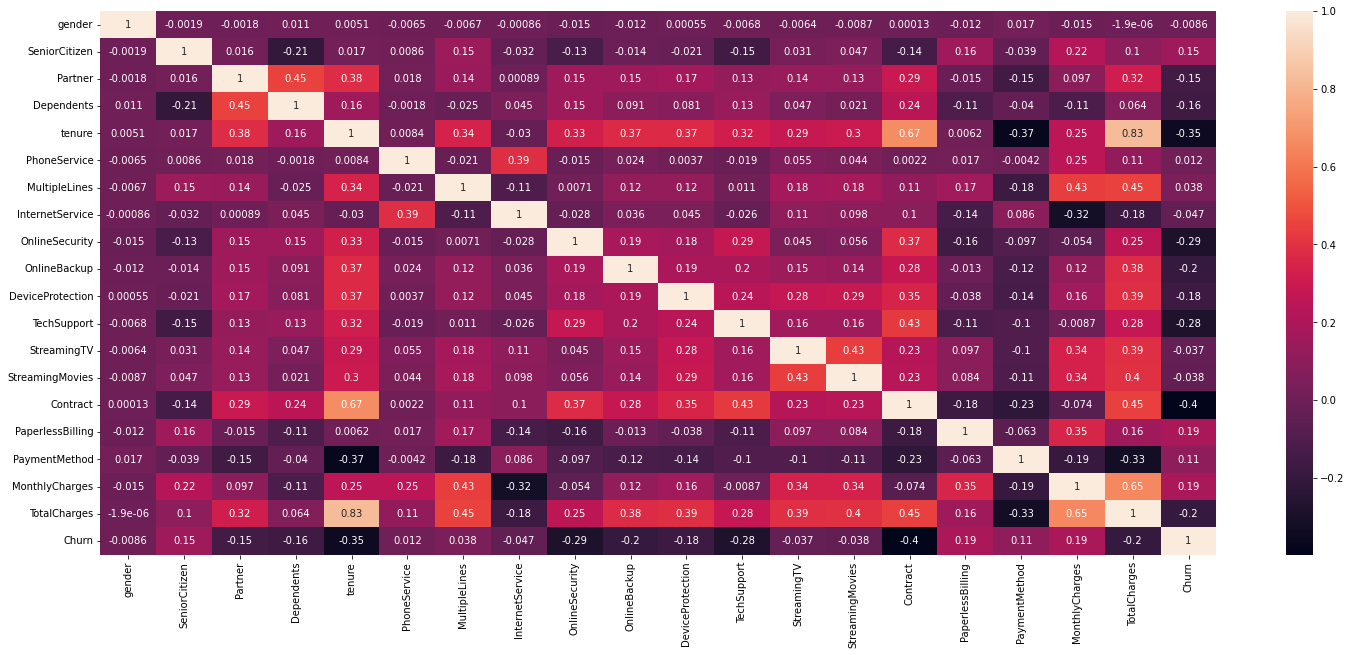

In [1746]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(25,10))
sns.heatmap(customer.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

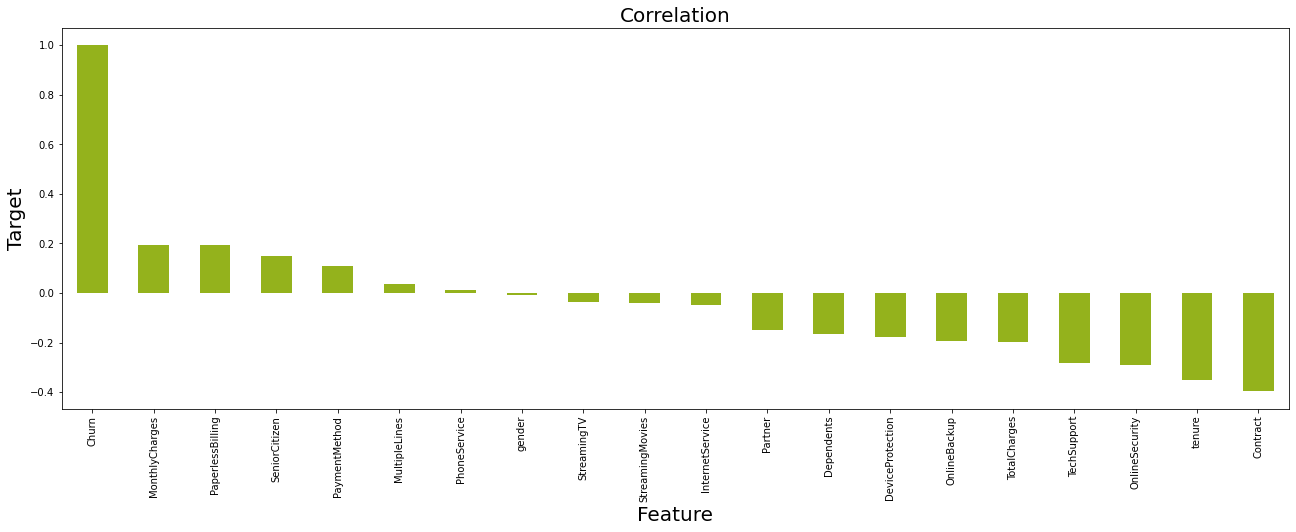

In [1747]:
# Checking Correlation of the input attributes with the Target variable 'capacity_mw' by Bar Plot

plt.figure(figsize=(22,7))
customer.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',color='#94b21c')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [1748]:
customer.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199037
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

### Observations

Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, OnlineBackup, DeviceProtection, Dependents, Partner,
InternetService, StreamingMovies, StreamingTV and gender are negatively correlated with target variable 'Churn'

PhoneService, MultipleLines, PaymentMethod, SeniorCitizen, PaperlessBilling and MonthlyCharges are positively correlated
with target variable 'Churn'

Also we can observe in heatmap payment method is highly negatively correlated with tenure, Total Charges and Monthly Charges

## Outliers Treatment with Zscore

In [1749]:
# Removing outliers with zscore 

from scipy.stats import zscore

col = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
z1 = customer[col]
z1.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65

In [1750]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [1751]:
customer_new = customer[(z<3).all(axis=1)]

In [1752]:
customer.shape

(7043, 20)

In [1753]:
customer_new.shape

(7043, 20)

### Observations

Applied Zscore method to check if there are any outliers present in the dataset, as we observed earlier there are no outliers
present against the threshold of 3

## Skewness

In [1754]:
customer.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

In [1755]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['SeniorCitizen','TotalCharges']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
customer[skew] = pt.fit_transform(customer[skew].values)

In [1756]:
customer.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.144337
Churn               1.063031
dtype: float64

### Observations

Skewness is present in the column SeniorCitizen and TotalCharges

Applied Power Transformer - 'yeo-johnson' method and skewness reduced in column Total Charges

For Senior Citizen skewness was not reduced and when tried applying Log,Sqrt and Cbrt skewness is becoming NaN, instead 
of dropping the column Senior Citizen, keeping the threshold of +/-1.8 for numerical columns

## Variance Inflation Factor

In [1757]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = customer.drop("Churn",axis=1)
x.sample(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4555       1           -0.0        1           1      19             1   
3737       0           -0.0        0           0       5             1   
3354       0           -0.0        0           0      54             0   
1979       0           -0.0        1           1      45             1   
5633       1           -0.0        0           1       6             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
4555              0                2               1             1   
3737              2                0               0             0   
3354              1                0               2             0   
1979              0                2               1             1   
5633              2                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
4555                 1            1            1                1         2   
3737                 0            0            0                0         0   
3354                 0            2            0                2         1   
1979                 1            1            1                1         2   
5633                 1            1            1                1         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
4555                 0              3           20.20     13.947345  
3737                 1              3           50.60     12.070892  
3354                 0              0           44.10     24.365460  
1979                 1              0           20.00     18.119354  
5633                 0              3           26.35     10.879971

In [1758]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor          Features
0     1.945141            gender
1     1.368357     SeniorCitizen
2     2.828646           Partner
3     1.965761        Dependents
4    26.638787            tenure
5    14.707624      PhoneService
6     2.770163     MultipleLines
7     4.349577   InternetService
8     2.283102    OnlineSecurity
9     2.446299      OnlineBackup
10    2.640562  DeviceProtection
11    2.413224       TechSupport
12    3.232398       StreamingTV
13    3.257544   StreamingMovies
14    4.208979          Contract
15    2.835113  PaperlessBilling
16    3.042142     PaymentMethod
17   26.646315    MonthlyCharges
18   80.217172      TotalCharges


In [1759]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['MonthlyCharges','TotalCharges','tenure']
st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3017       0      -0.000000        1           1 -0.585198             1   
911        0       0.113719        0           0 -0.707359             1   
7018       1      -0.000000        1           1 -1.277445             1   
2543       1      -0.000000        0           0 -0.788800             1   
2795       0       0.113719        0           0 -0.951682             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3017              0                0               2             2   
911               2                1               0             2   
7018              0                1               0             0   
2543              2                1               2             0   
2795              2                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
3017                 0            2            0                0         1   
911                  0            0            2                0         0   
7018                 0            0            0                0         0   
2543                 0            0            2                2         0   
2795                 0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
3017                 1              3       -0.108405     -0.162308  
911                  0              1        0.805583     -0.040673  
7018                 1              3        0.195703     -1.543677  
2543                 0              3        1.109692     -0.074282  
2795                 1              2        0.325324     -0.527153

In [1760]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor          Features
0     1.945464            gender
1     1.339072     SeniorCitizen
2     2.776555           Partner
3     1.975496        Dependents
4    10.822233            tenure
5     9.228016      PhoneService
6     2.439274     MultipleLines
7     4.204600   InternetService
8     2.253372    OnlineSecurity
9     2.368480      OnlineBackup
10    2.576170  DeviceProtection
11    2.404382       TechSupport
12    3.138173       StreamingTV
13    3.138982   StreamingMovies
14    4.215132          Contract
15    2.600784  PaperlessBilling
16    3.452984     PaymentMethod
17    4.350902    MonthlyCharges
18   14.031951      TotalCharges


In [1761]:
from sklearn.decomposition import PCA


m = ['tenure','TotalCharges']
pc = PCA(n_components = 2)
x[m] = pc.fit_transform(x[m].values)
x.sample(5)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
6990       1           -0.0        1           0  0.639717             1   
4076       1           -0.0        1           0  2.144853             1   
5063       1           -0.0        0           0 -0.158782             1   
6931       1           -0.0        0           0  1.648910             1   
6765       0           -0.0        1           1  1.166129             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
6990              0                1               2             0   
4076              2                1               2             2   
5063              2                1               0             2   
6931              0                1               2             2   
6765              2                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
6990                 0            0            2                2         0   
4076                 2            0            2                0         2   
5063                 0            0            0                0         0   
6931                 0            0            2                2         1   
6765                 1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
6990                 1              2        0.958468     -0.430741  
4076                 1              1        1.149575      0.022090  
5063                 1              2        0.584564     -0.496052  
6931                 0              0        1.142928     -0.173014  
6765                 1              0       -1.301576      0.943228

In [1763]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor          Features
0     1.945464            gender
1     1.339072     SeniorCitizen
2     2.776555           Partner
3     1.975496        Dependents
4     3.153717            tenure
5     9.228016      PhoneService
6     2.439274     MultipleLines
7     4.204600   InternetService
8     2.253372    OnlineSecurity
9     2.368480      OnlineBackup
10    2.576170  DeviceProtection
11    2.404382       TechSupport
12    3.138173       StreamingTV
13    3.138982   StreamingMovies
14    4.215132          Contract
15    2.600784  PaperlessBilling
16    3.452984     PaymentMethod
17    4.350902    MonthlyCharges
18    3.100360      TotalCharges


### Observations

VIF is high in features tenure, Monthly Charges, Total Charges and Phone Service

Applied standard scaler method to standardize the features and VIF reduced in column Monthly Charges

Instead of dropping the column TotalCharges and tenure for high VIF, applied PCA method to standardize the feature tenure and Total Charges 

## Applying SMOTE Technique

In [1764]:
#Splitting the features to x and y
    
x.shape

(7043, 19)

In [1765]:
y = customer['Churn']
y.shape

(7043,)

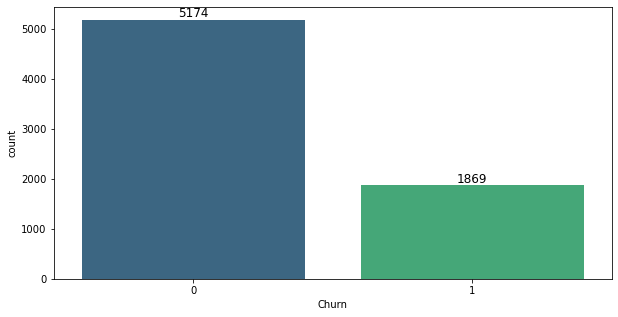

In [1766]:
# Checking the count of feature 'Churn' 

plt.figure(figsize=(10,5))
ct = sns.countplot(y,palette='viridis')
for i in ct.containers:
    ct.bar_label(i,fontsize=12)

Above countplot shows the classes are imbalanced, hence applying SMOTE technique to balance the classes

In [1767]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [1768]:
# Applying SMOTE technique 

smt = SMOTE()

x2,y2 = smt.fit_resample(x,y)

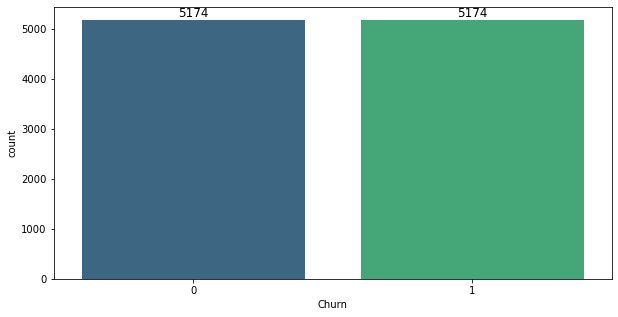

In [1769]:
# Checking the count of feature 'Churn' after applying 'SMOTE'

plt.figure(figsize=(10,5))
sx=sns.countplot(y2,palette='viridis')
for i in sx.containers:
    sx.bar_label(i,fontsize=12)

### Observations

Classes are imbalanced in target variable Churn

Applied SMOTE technique to balance the Target Variable Churn

Above countplot shows target variable is balanced in all the category

# Model Evaluation

In [1770]:
# Checking the dimension of the data 

x2.shape

(10348, 19)

In [1772]:
# Checking the dimension of the data 

y2.shape

(10348,)

In [1773]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [1774]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x2_train,y2_train)
    predlr = lr.predict(x2_test)
    acc = accuracy_score(y2_test,predlr)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 80.4830917874396 on Random State 110


## Train and Split

In [1775]:
# Training the Model with .30 as test size and random state at 110

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30, random_state=110)

In [1776]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## GaussianNB

In [1777]:
GB = GaussianNB()
GB.fit(x2_train,y2_train)
print(GB.score(x2_train,y2_train))
GB_predict = GB.predict(x2_test)
cr1 = cross_val_score(GB,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GB_predict)*100)
print('CV score of GaussianNB:',cr1.mean()*100)
print(confusion_matrix(y2_test,GB_predict))
print(classification_report(y2_test,GB_predict))

0.7662570757973216
Accuracy Score: 78.38969404186795
CV score of GaussianNB: 76.63356238748678
[[1174  415]
 [ 256 1260]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1589
           1       0.75      0.83      0.79      1516

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



## LogisticRegression

In [1778]:
LR = LogisticRegression()
LR.fit(x2_train,y2_train)
print(LR.score(x2_train,y2_train))
LR_predict = LR.predict(x2_test)
cr2 = cross_val_score(LR,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr2.mean()*100)
print(confusion_matrix(y2_test,LR_predict))
print(classification_report(y2_test,LR_predict))

0.7795112522435454
Accuracy Score: 80.4830917874396
CV score of LogisticRegression: 78.48895706810684
[[1221  368]
 [ 238 1278]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1589
           1       0.78      0.84      0.81      1516

    accuracy                           0.80      3105
   macro avg       0.81      0.81      0.80      3105
weighted avg       0.81      0.80      0.80      3105



## Support Vector Classifier

In [1779]:
SV = SVC()
SV.fit(x2_train,y2_train)
print(SV.score(x2_train,y2_train))
SV_predict = SV.predict(x2_test)
cr3 = cross_val_score(SV,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,SV_predict)*100)
print('CV score of SVC:',cr3.mean()*100)
print(confusion_matrix(y2_test,SV_predict))
print(classification_report(y2_test,SV_predict))

0.8096092779235123
Accuracy Score: 80.96618357487922
CV score of SVC: 79.77435480745207
[[1229  360]
 [ 231 1285]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1589
           1       0.78      0.85      0.81      1516

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



## RandomForestClassifier

In [1780]:
RFC = RandomForestClassifier()
RFC.fit(x2_train,y2_train)
print(RFC.score(x2_train,y2_train))
RFC_predict = RFC.predict(x2_test)
cr4 = cross_val_score(RFC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr4.mean()*100)
print(confusion_matrix(y2_test,RFC_predict))
print(classification_report(y2_test,RFC_predict))

0.9987574209581666
Accuracy Score: 85.02415458937197
CV score of RandomForestClassifier: 84.13292145613997
[[1339  250]
 [ 215 1301]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1589
           1       0.84      0.86      0.85      1516

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



## ExtraTreeClassifier

In [1781]:
ET = ExtraTreeClassifier()
ET.fit(x2_train,y2_train)
print(ET.score(x2_train,y2_train))
ET_predict = ET.predict(x2_test)
cr5 = cross_val_score(ET,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,ET_predict)*100)
print('CV score of RandomForestClassifier:',cr5.mean()*100)
print(confusion_matrix(y2_test,ET_predict))
print(classification_report(y2_test,ET_predict))

0.998895485296148
Accuracy Score: 78.67954911433172
CV score of RandomForestClassifier: 78.12204080012515
[[1254  335]
 [ 327 1189]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1589
           1       0.78      0.78      0.78      1516

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



## DecisionTreeClassifier

In [1782]:
DTC = DecisionTreeClassifier()
DTC.fit(x2_train,y2_train)
print(DTC.score(x2_train,y2_train))
DTC_predict = DTC.predict(x2_test)
cr6 = cross_val_score(DTC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr6.mean()*100)
print(confusion_matrix(y2_test,DTC_predict))
print(classification_report(y2_test,DTC_predict))

0.998895485296148
Accuracy Score: 77.5523349436393
CV score of DecisionTreeClassifier: 77.89020344024861
[[1217  372]
 [ 325 1191]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1589
           1       0.76      0.79      0.77      1516

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



## KNeighborsClassifier

In [1783]:
KNC = KNeighborsClassifier()
KNC.fit(x2_train,y2_train)
print(KNC.score(x2_train,y2_train))
KNC_predict = KNC.predict(x2_test)
cr7 = cross_val_score(KNC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,KNC_predict)*100)
print('CV score of KNeighborsClassifier:',cr7.mean()*100)
print(confusion_matrix(y2_test,KNC_predict))
print(classification_report(y2_test,KNC_predict))

0.8575176032030927
Accuracy Score: 80.22544283413848
CV score of KNeighborsClassifier: 80.39264691804252
[[1146  443]
 [ 171 1345]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1589
           1       0.75      0.89      0.81      1516

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105



## GradientBoostingClassifier

In [1784]:
GBC = GradientBoostingClassifier()
GBC.fit(x2_train,y2_train)
print(GBC.score(x2_train,y2_train))
GBC_predict = GBC.predict(x2_test)
cr8 = cross_val_score(GBC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:',cr8.mean()*100)
print(confusion_matrix(y2_test,GBC_predict))
print(classification_report(y2_test,GBC_predict))

0.8241060334115697
Accuracy Score: 82.54428341384863
CV score of GradientBoostingClassifier: 80.34455255053317
[[1266  323]
 [ 219 1297]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1589
           1       0.80      0.86      0.83      1516

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



## AdaBoostClassifier

In [1785]:
ABC = AdaBoostClassifier()
ABC.fit(x2_train,y2_train)
print(ABC.score(x2_train,y2_train))
ABC_predict = ABC.predict(x2_test)
cr9 = cross_val_score(ABC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:',cr9.mean()*100)
print(confusion_matrix(y2_test,ABC_predict))
print(classification_report(y2_test,ABC_predict))

0.797045423167196
Accuracy Score: 81.4170692431562
CV score of AdaBoostClassifier: 79.43614385814988
[[1244  345]
 [ 232 1284]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1589
           1       0.79      0.85      0.82      1516

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



## BaggingClassifier

In [1786]:
BC = BaggingClassifier()
BC.fit(x2_train,y2_train)
print(BC.score(x2_train,y2_train))
BC_predict = BC.predict(x2_test)
cr10 = cross_val_score(BC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,BC_predict)*100)
print('CV score of BaggingClassifier:',cr10.mean()*100)
print(confusion_matrix(y2_test,BC_predict))
print(classification_report(y2_test,BC_predict))

0.9857793731879055
Accuracy Score: 83.02737520128825
CV score of BaggingClassifier: 81.75578764508514
[[1350  239]
 [ 288 1228]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1589
           1       0.84      0.81      0.82      1516

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [1787]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

GaussianNB() 0.7849820085648197
LogisticRegression() 0.8057078596086884
RandomForestClassifier() 0.850423882198027
ExtraTreeClassifier() 0.7867381868419262
DecisionTreeClassifier() 0.7757552749692396
KNeighborsClassifier() 0.804205736669152
GradientBoostingClassifier() 0.8261341993354709
AdaBoostClassifier() 0.8149240075652033
BaggingClassifier() 0.8298086614604695


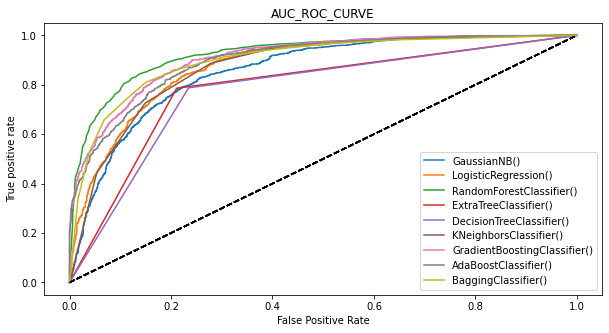

In [1788]:
model = [GB,LR,RFC,ET,DTC,KNC,GBC,ABC,BC]
auc=[]

plt.figure(figsize=(10,5))
for i in model:
    y_pred_prob = i.predict_proba(x2_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()

for j in model:
    auc_score = roc_auc_score(y2_test,j.predict(x2_test))
    auc.append(auc_score)
    print(j,auc_score)

### Observations

Random Forest Classifier model is performing well with Accuracy Score 85%, Cross Validation Score 84% and roc_auc_score 85%
Moreover we can observe other models Logistic Regression, BaggingClassifier, LogisticRegression, KNeighborsClassifier and
GradientBoostingClassifier are performing close with Random Forest Classifier.

Proceeding with Hyper Parameter Tunning for the Models listed above

## Hyper Parameter Tuning

### Hyper Parameter Tuning - BaggingClassifier

In [1790]:
grid_params={'n_estimators':[50,100,150,200],
             'max_samples':[0.5, 0.7, 0.9],'max_features':[0.5, 0.7, 0.9,1.0,],'bootstrap':[bool,False]}
             
        
gs = GridSearchCV(BaggingClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [<class 'bool'>, False],
                         'max_features': [0.5, 0.7, 0.9, 1.0],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.8256235963838654
Best Params {'bootstrap': <class 'bool'>, 'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 150}


In [1794]:
# Applying parameters for BaggingClassifier

Final_Model = BaggingClassifier(max_features =0.7,max_samples = 0.9,n_estimators=150,bootstrap='bool')
                                       
Final_Model.fit(x2_train,y2_train)
pred = Final_Model.predict(x2_test)
print(Final_Model.score(x2_train,y2_train))
cr11 = cross_val_score(Final_Model,x2,y2,cv=5)

print(accuracy_score(y2_test,pred)*100)
print('CV score of BaggingClassifier:',cr11.mean()*100)
print(confusion_matrix(y2_test,pred))
print(classification_report(y2_test,pred))

0.9984812922822035
84.54106280193237
CV score of BaggingClassifier: 83.3790274187862
[[1327  262]
 [ 218 1298]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1589
           1       0.83      0.86      0.84      1516

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



### Hyper Parameter Tuning - RandomForestClassifier

In [1792]:
grid_params={'n_estimators':[50,100,150,200],'criterion':['gini','entropy','log_loss'],
            'max_depth':[5,10,20,50],'min_samples_split':[2,4,5],'max_features':['sqrt','log2']}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.831559295989995
Best Params {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [1795]:
# Applying parameters for RandomForestClassifier

Final_Model2 = RandomForestClassifier(criterion ='gini',max_depth = 20,max_features ='sqrt',
                                      min_samples_split=2, n_estimators=100)
                                       
Final_Model2.fit(x2_train,y2_train)
pred2 = Final_Model2.predict(x2_test)
print(Final_Model2.score(x2_train,y2_train))
cr12 = cross_val_score(Final_Model2,x2,y2,cv=5)

print(accuracy_score(y2_test,pred2)*100)
print('CV score of RandomForestClassifier:',cr12.mean()*100)
print(confusion_matrix(y2_test,pred2))
print(classification_report(y2_test,pred2))

0.9984812922822035
85.5072463768116
CV score of RandomForestClassifier: 84.12320825248727
[[1346  243]
 [ 207 1309]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1589
           1       0.84      0.86      0.85      1516

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



### Hyper Parameter Tuning - LogisticRegression

In [1796]:
grid_params={'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1','l2'],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'class_weight': [None,'balanced']}
             
        
gs = GridSearchCV(LogisticRegression(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})
Best Score 0.7790958900975717
Best Params {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [1797]:
# Applying parameters for LogisticRegression

Final_Model3 = LogisticRegression(C =10, class_weight = 'balanced', penalty='l1' ,solver='liblinear')
                                       
Final_Model3.fit(x2_train,y2_train)
pred3 = Final_Model3.predict(x2_test)
print(Final_Model3.score(x2_train,y2_train))
cr13 = cross_val_score(Final_Model3,x2,y2,cv=5)

print(accuracy_score(y2_test,pred3)*100)
print('CV score of LogisticRegression:',cr13.mean()*100)
print(confusion_matrix(y2_test,pred3))
print(classification_report(y2_test,pred3))

0.7808918956233605
80.4830917874396
CV score of LogisticRegression: 78.51792856592488
[[1225  364]
 [ 242 1274]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1589
           1       0.78      0.84      0.81      1516

    accuracy                           0.80      3105
   macro avg       0.81      0.81      0.80      3105
weighted avg       0.81      0.80      0.80      3105



### Hyper Parameter Tuning - KNeighborsClassifier

In [1798]:
grid_params={'n_neighbors': [3,5,7,9,11,13,15],'weights': ['uniform','distance'],'algorithm':['ball_tree','auto',
             'kd_tree','brute'],'metric':['euclidean','manhattan','minkowski']}
             
        
gs = GridSearchCV(KNeighborsClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'auto', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})
Best Score 0.7978740339117472
Best Params {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [1799]:
# Applying parameters for KNeighborsClassifier

Final_Model4 = KNeighborsClassifier(algorithm ='ball_tree', metric = 'manhattan', n_neighbors=5 ,weights='distance')
                                       
Final_Model4.fit(x2_train,y2_train)
pred4 = Final_Model4.predict(x2_test)
print(Final_Model4.score(x2_train,y2_train))
cr14 = cross_val_score(Final_Model4,x2,y2,cv=5)

print(accuracy_score(y2_test,pred4)*100)
print('CV score of KNeighborsClassifier:',cr14.mean()*100)
print(confusion_matrix(y2_test,pred4))
print(classification_report(y2_test,pred4))

0.998895485296148
81.67471819645733
CV score of KNeighborsClassifier: 82.40274771587946
[[1190  399]
 [ 170 1346]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1589
           1       0.77      0.89      0.83      1516

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



### Hyper Parameter Tuning - GradientBoostingClassifier

In [1800]:
grid_params={'n_estimators': [50,100,150,200],'loss':['log_loss','deviance','exponential'],
              'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,4,5]}
             
        
gs = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.8078141145160123
Best Params {'criterion': 'friedman_mse', 'loss': 'deviance', 'min_samples_split': 4, 'n_estimators': 200}


In [1801]:
# Applying parameters for GradientBoostingClassifier

Final_Model5 = GradientBoostingClassifier(n_estimators =200,criterion='friedman_mse',loss='deviance',min_samples_split=4)
                                       
Final_Model5.fit(x2_train,y2_train)
pred5 = Final_Model5.predict(x2_test)
print(Final_Model5.score(x2_train,y2_train))
cr15 = cross_val_score(Final_Model5,x2,y2,cv=5)

print(accuracy_score(y2_test,pred5)*100)
print('CV score of LogisticRegression:',cr15.mean()*100)
print(confusion_matrix(y2_test,pred5))
print(classification_report(y2_test,pred5))

0.8446776197708132
82.73752012882449
CV score of LogisticRegression: 80.52821148633029
[[1281  308]
 [ 228 1288]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1589
           1       0.81      0.85      0.83      1516

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



## AUC_ROC_Curve_Random Forest Classifier

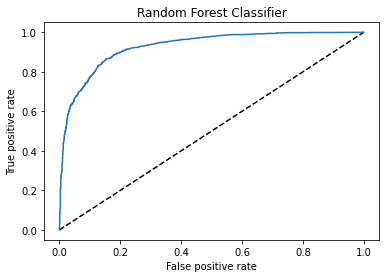

0.8552650477972737

In [1807]:
# Checking roc_auc_score for Random Forest Classifier - Final Model2

y_pred_prob_RBC = Final_Model2.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob_RBC,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score = roc_auc_score(y2_test,Final_Model2.predict(x2_test))
auc_score

### Observation

Based on Hyper Parameter Tuning Random Forest Classifier performance is good and Accuracy Score improved to 86% with Cross
Validation Score 84%, ROC_AUC_Curve score 85% and below classification report is also good compared with other models after 
tuning

                    precision   recall   f1-score   support

               0       0.87      0.85      0.86      1589
        
               1       0.84      0.86      0.85      1516

        accuracy                           0.86      3105
    
       macro avg       0.86      0.86      0.86      3105
    
    weighted avg       0.86      0.86      0.86      3105


Concluding Random Forest Classifier as the best fit model for prediction

# Saving the Final model - RandomForestClassifier

In [1803]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model2,"Customer_Churn_Prediction.pkl")

['Customer_Churn_Prediction.pkl']

# Predicting the Model

In [1804]:
# Loading the saved model

Model=joblib.load("Customer_Churn_Prediction.pkl")

#Prediction
prediction = Model.predict(x2_test)
prediction

array([1, 1, 1, ..., 1, 0, 0])

In [1805]:
pd.DataFrame([Model.predict(x2_test)[:],y2_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0             1         0
1             1         1
2             1         1
3             1         1
4             1         1
5             1         1
6             0         0
7             1         0
8             0         1
9             1         1
10            1         1
11            1         1
12            0         0
13            1         1
14            1         0
15            0         0
16            0         0
17            0         1
18            0         0
19            0         0
20            0         0
21            1         0
22            1         0
23            1         1
24            1         1
25            1         1
26            1         1
27            1         1
28            0         0
29            1         1
30            0         0
31            1         0
32            1         0
33            1         1
34            1         1
35            1         1
36            1         1
37            1         1
38            0         0
39            0         0
40            0         0
41            1         1
42            0         0
43            1         1
44            1         0
45            0         0
46            0         1
47            1         0
48            0         0
49            0         0
50            1         0
51            1         1
52            0         0
53            1         0
54            0         0
55            0         1
56            0         1
57            1         0
58            1         1
59            0         0
60            0         0
61            1         1
62            1         0
63            0         0
64            1         1
65            0         0
66            1         1
67            0         0
68            0         0
69            1         1
70            1         1
71            1         1
72            1         1
73            1         1
74            0         1
75            1         1
76            1         1
77            1         0
78            1         0
79            0         0
80            0         0
81            1         0
82            1         1
83            0         0
84            1         0
85            1         1
86            0         1
87            1         1
88            1         1
89            0         0
90            0         0
91            0         1
92            0         0
93            0         1
94            0         0
95            1         1
96            1         1
97            0         0
98            0         0
99            1         1
100           1         1
101           1         1
102           0         0
103           0         0
104           1         0
105           1         1
106           0         0
107           1         1
108           1         0
109           0         0
110           1         1
111           0         1
112           0         0
113           1         1
114           0         0
115           1         1
116           0         0
117           1         0
118           0         1
119           0         0
120           1         0
121           0         0
122           1         1
123           1         1
124           1         1
125           1         1
126           0         0
127           0         0
128           0         0
129           0         0
130           1         1
131           1         1
132           1         1
133           1         1
134           1         1
135           1         1
136           0         0
137           1         0
138           0         0
139           1         1
140           1         1
141           0         0
142           1         1
143           0         0
144           0         0
145           1         1
146           1         1
147           1         1
148           1         1
149           0         0
150           0         0
151           1         1
152           0         0
15

# Conclusion

### Summary for Data Analysis

Telecom_customer_churn dataset contains 7043 rows and 21 columns

In gender both Male and Female count are almost same but Male count is slightly higher than female

More number of Senior Citizen were Churner's and their Total Charges are below 4000

Maximum Customer's churn are customers with No partner and No Dependents compared with Customer's with Partner and Dependents

Churner's were high with Customer's who use Phone Service and have Multiple Lines
Also Customer's(Both Churner's and Non Churner's) paying Total Charges below 4000 are maximum in numbers with No Phone Service and No Multiple Lines

Churner's count is high with customer's who dont have Online Backup and Online Security

Most of the customers who took Tech Support are Non Churners, on the otherside we can see Customer's who didnt take Tech Support are very high and they are Churner's

Churner's who didnt have Device Protection and No Tech Support are maximum in numbers with their Total Charges ranges below 4000

Customer's who use Fiber Optic Internet service and no Online Security are maximum churner's

In Streaming TV and Movies Male customer's are high in both Churner's and Non Churner's 

In Payment method: Customer's who are using paperless billing are maximimum churner's
    
Customer's who pay high Monthly Charges are maximum churner's, when comparing with paying low Monthly Charges
Paying high Monthly charges increases Total Charges which leads the customer's to churn

Customer's with less tenure are maximum churner's and most of their Total Charges are below 6000

It is recommended to include customer satisfaction as one of the input feature, so it will help us to analyse even better
and helps the Telecom company to understand their customer's 

### Summary for Model Evaluation

After dropping Customer ID, Telecom_customer_churn dataset contains 7043 rows and 20 columns

Null values were present in the column Total Charges and to replace them tried multiple methods as listed below

1. Dropped the null values from the dataset which are minimal in numbers and tested the model - but the result was good but there was no improvement in tuning

2. Replaced  TotalCharges vs MonthlyCharges, as there were 624 rows out of 6419 are same which means there are chances of Total Charges and Monthly charges to be same, hence replaced the 11 null values with monthly charges instead of imputation technique –  result was good but there was no improvement in tuning

3. Replaced null values with median(Total Charges is skewed) and the result was good in Model Evaluation and tuning compared with above first and second method

Label Encoding

Applied One Hot Encoding method to convert categorical columns to numerical - result was good in Model Evaluation and tuning

Applied Label Encoder to convert categorical columns to numerical - result was good in Model Evaluation and tuning

In both the methods result were same, but One Hot Encoding created lot of features and it affected in VIF, 
were I had to drop lot of features to reduce Multicollinearity.
Hence I have chosen Label Encoder, without dropping any features


Outliers are not detected based on the threshold(3)

Skewness were handled using different techniques and mentioned below

1. Applied log, sqrt and cbrt separately and dropped the column Senior Citizen(skewness was not reduced) - Result was good in Model Evaluation and not in tuning

2. Applied power transformer yeo- johnson and didn't drop the column Senior Citizen(kept the threshold +/- 1.8 for numerical columns) - Result was good in Model Evaluation and improved in tuning

Multicollinearity - VIF was high in features tenure, Monthly Charges, Total Charges and Phone Service

Applied standard scaler method to standardize the features and VIF reduced in column Monthly Charges
Instead of dropping the column TotalCharges and tenure for high VIF, applied PCA method to standardize the feature tenure and Total Charges

Also, tried dropping the Total Charges(Not applied PCA) and tested the model - Result was good in Model Evaluation and not in tuning

Classes were imbalanced in target variable Churn, hence applied SMOTE technique to balance the Target Variable Churn

By implementing above mentioned methods

Finally, 10348 rows 19 columns were utilized to build and predict 'Churn'

For Model Evaluation 70/30 is the train,test size used for evaluating the Model with random_state= 110

Random Forest Classifier model performed well, Moreover we can observe other models Logistic Regression, BaggingClassifier, KNeighborsClassifier and GradientBoostingClassifier performance were close with Random Forest Classifier, hence applied hyper parameter tuning for all these Models

Based on Hyper Parameter Tuning Random Forest Classifier performance is good and Accuracy Score improved to 86% with Cross Validation Score 84%, ROC_AUC_Curve score 85% and below classification report is also good compared with other models after tuning

                    precision   recall   f1-score   support

               0       0.87      0.85      0.86      1589

               1       0.84      0.86      0.85      1516

        accuracy                           0.86      3105

        macro avg       0.86      0.86      0.86      3105

    weighted avg       0.86      0.86      0.86      3105


When we compare Predicted Vs Original we can observe RandomForestClassifier is performing well and prediction is same with original

Concluded Random Forest Classifier is the best fit model to predict 'Churn' for the Customer Churn Analysis dataset

Thank you for Providing the opportunity to work on the Customer Churn Analysis dataset